# **Chloe Tee Rouyi 0354731**

**Weather Classification** - Create a weather classification to classify between extreme and normal weather conditions

### **Importing Libraries**

In [603]:
# Core Libraries
import numpy as np
import pandas as pd
import collections

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Preprocessing, Modeling, and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve)

# Google Colab: File & Drive Access
from google.colab import drive, files

# **1.0 Import the Dataset**


*   Import dataset using google drive


In [604]:
# Mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [605]:
# Load the dataset
data_dir = "/content/drive/MyDrive/MLPC Assignment 2 /GlobalWeatherRepository.csv"
df = pd.read_csv(data_dir, header=0)

# **2.0 Explore the Dataset & Preprocessing**


*   df.shape - print out how many rows and columns
*   df.info - concise summary of the dataset
*   df.head - prints first 5 rows of the dataset
*   df.tail - prints the last 5 rows of the dataset
*   count how many conditions are there in the "condition_text" column
*   check for missing values
*   drop any unnecessary columns
*   shuffle the data

In [606]:
# Checks how many rows and columns there are in the dataset
df.shape

(80866, 41)

In [607]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80866 entries, 0 to 80865
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       80866 non-null  object 
 1   location_name                 80866 non-null  object 
 2   latitude                      80866 non-null  float64
 3   longitude                     80866 non-null  float64
 4   timezone                      80866 non-null  object 
 5   last_updated_epoch            80866 non-null  int64  
 6   last_updated                  80866 non-null  object 
 7   temperature_celsius           80866 non-null  float64
 8   temperature_fahrenheit        80866 non-null  float64
 9   condition_text                80866 non-null  object 
 10  wind_mph                      80866 non-null  float64
 11  wind_kph                      80866 non-null  float64
 12  wind_degree                   80866 non-null  int64  
 13  w

In [608]:
#Overview of the dataset - first 5 rows
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [609]:
#Overview of the dataset - last 5 rows
df.tail()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
80861,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1751796000,2025-07-06 06:00,24.0,75.2,Partly cloudy,...,12.210,22.015,1,2,06:11 AM,06:54 PM,03:29 PM,02:25 AM,Waxing Gibbous,80
80862,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1751796000,2025-07-06 17:00,33.1,91.6,Patchy light drizzle,...,94.905,96.015,4,10,05:21 AM,06:42 PM,02:53 PM,01:16 AM,Waxing Gibbous,76
80863,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1751796900,2025-07-06 13:15,28.0,82.4,Partly Cloudy,...,39.590,185.740,2,4,05:38 AM,06:38 PM,02:58 PM,01:40 AM,Waxing Gibbous,77
80864,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1751796900,2025-07-06 12:15,24.7,76.4,Sunny,...,5.550,5.735,1,1,06:34 AM,05:49 PM,02:07 PM,02:36 AM,Waxing Gibbous,78
80865,Zimbabwe,Harare,-17.8178,31.0447,Africa/Harare,1751794200,2025-07-06 11:30,22.0,71.6,Sunny,...,16.835,17.205,2,2,06:27 AM,05:34 PM,01:51 PM,02:29 AM,Waxing Gibbous,78


### **Checking Types of Conditions**

In [610]:
# Count how many conditions are there in the column 'condition_text'
condition_counts = df['condition_text'].value_counts().sort_values(ascending=False)

print(condition_counts)

condition_text
Partly cloudy                                  26192
Sunny                                          24857
Patchy rain nearby                              6511
Partly Cloudy                                   4040
Overcast                                        3830
Clear                                           3441
Mist                                            2488
Light rain                                      2348
Light rain shower                               1983
Cloudy                                           760
Fog                                              754
Moderate or heavy rain with thunder              669
Moderate rain                                    542
Patchy light rain with thunder                   490
Light drizzle                                    354
Patchy light drizzle                             238
Light snow                                       189
Moderate or heavy rain shower                    187
Thundery outbreaks in nearby   

/tmp/ipython-input-611-2142376699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.values, y=condition_counts.index, palette='viridis')


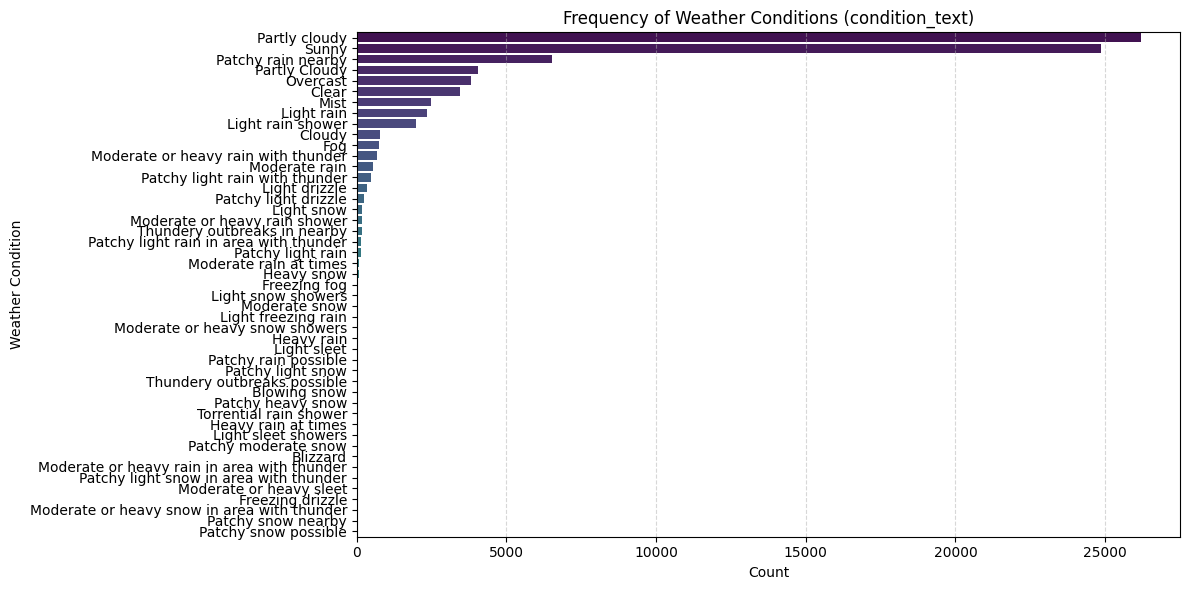

In [611]:
# Plot a bar chart for better visualization of the types of conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=condition_counts.values, y=condition_counts.index, palette='viridis')
plt.title("Frequency of Weather Conditions (condition_text)")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### **Dropping Irrelevant Columns/Redundant Columns**

In [612]:
# The columns that are relevant
relevant_columns = [
    'temperature_celsius', 'feels_like_celsius', 'humidity', 'precip_mm', 'uv_index',
    'wind_kph', 'gust_kph', 'wind_degree', 'pressure_mb', 'cloud',
    'visibility_km', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'last_updated', 'country', 'location_name', 'latitude', 'longitude'
]

# Keep only relevant columns
df = df[relevant_columns]

### **Missing Values**


 *   df.isnull().sum() - to check how many missing values are there in the dataset

In [613]:
df_clean = df.copy()

# Total of missing values
df.isnull().sum()

,0
temperature_celsius,0
feels_like_celsius,0
humidity,0
precip_mm,0
uv_index,0
wind_kph,0
gust_kph,0
wind_degree,0
pressure_mb,0
cloud,0


### **Parsing last_updated column to datetime**

In [614]:
# Make sure that it is in the correct data type
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

/tmp/ipython-input-614-1086287078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')


### **Shuffling Dataset**


*   Prevents the model from learning biases introduced by the original data order

In [615]:
# Shuffling the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df_shuffled

### **New shuffled table**

In [616]:
# Displaying the first 5 rows of the new shuffled dataset
df.head()

,temperature_celsius,feels_like_celsius,humidity,precip_mm,uv_index,wind_kph,gust_kph,wind_degree,pressure_mb,cloud,visibility_km,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,last_updated,country,location_name,latitude,longitude
0,23.2,24.2,47,0.00,4.6,9.7,11.2,78,1020.0,0,10.0,7.955,9.805,1,2025-06-12 10:45:00,Croatia,Zagreb,45.8000,16.0000
1,10.2,7.8,46,0.00,1.1,18.7,26.2,191,1013.0,25,10.0,5.478,12.417,1,2025-01-08 11:30:00,San Marino,San Marino,43.9333,12.4500
2,6.0,1.0,93,0.05,0.0,35.3,56.4,112,988.0,100,10.0,5.508,18.729,1,2024-10-23 09:30:00,Iceland,Vestmannaeyjar,63.3650,-20.2075
3,20.1,20.1,40,0.00,3.6,5.0,5.8,314,1023.0,25,10.0,14.615,18.315,1,2025-02-01 12:30:00,Cyprus,Nicosia,35.1667,33.3667
4,46.4,48.4,9,0.00,10.0,3.6,44.4,324,992.0,0,16.0,23.500,83.900,2,2024-06-26 16:30:00,Kuwait,Kuwait City,29.3700,47.9600


# **3.0 Feature Engineering**

### **Combining temperature_celsius and feels_like_celsius into one column: temp_range**

In [617]:
df['temp_range'] = df['temperature_celsius'] - df['feels_like_celsius']

### **Extracting the month number & day of the week from the datetime.**

In [618]:
df['month'] = df['last_updated'].dt.month
df['dayofweek'] = df['last_updated'].dt.dayofweek  # 0 = Monday, 6 = Sunday

### **Defining Thresholds**

In [619]:
# Thresholds set for classifying between "Extreme" (1) and "Normal" (0)
temp_thresh = 35
precip_thresh = df['precip_mm'].quantile(0.95)
uv_thresh = 7
aqi_thresh = 3

### **Labelling the weather "Extreme" (1) and "Normal" (0) based if it exceeds the threshold**

In [620]:
# Label 'extreme' weather events
df['extreme'] = (
    (df['temperature_celsius'] > temp_thresh) |
    (df['precip_mm'] > precip_thresh) |
    (df['uv_index'] >= uv_thresh) |
    (df['air_quality_us-epa-index'] > aqi_thresh)
).astype(int)

### **Displaying Counts for both Normal and Extreme**

In [621]:
print("Extreme (1):", df['extreme'].sum())
print("Normal (0):", (df['extreme'] == 0).sum())

Extreme (1): 30065
Normal (0): 50801


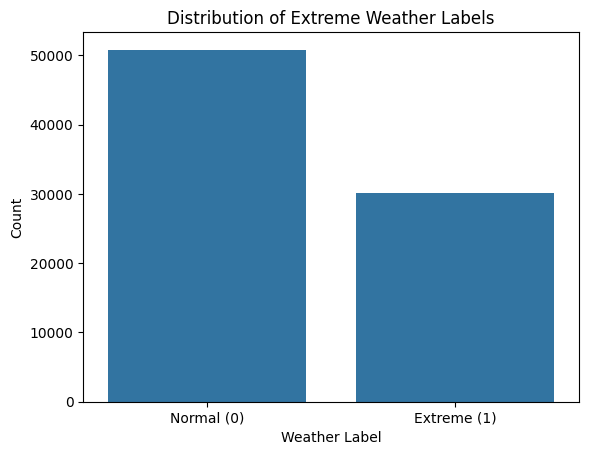

In [622]:
# Visualize the count in a bar chart
sns.countplot(data=df, x='extreme')
plt.title("Distribution of Extreme Weather Labels")
plt.xticks([0, 1], ['Normal (0)', 'Extreme (1)'])
plt.ylabel("Count")
plt.xlabel("Weather Label")
plt.show()

### **Ordering the Columns**

In [623]:
# Current viewing order is messy
ordered_columns = [
    'last_updated', 'country', 'location_name', 'latitude', 'longitude',
    'temperature_celsius', 'feels_like_celsius', 'temp_range', 'humidity', 'precip_mm', 'uv_index', 'cloud',
    'wind_kph', 'gust_kph', 'wind_degree', 'visibility_km', 'pressure_mb',
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'month', 'dayofweek', 'extreme'
]

# Reorder the DataFrame
df = df[ordered_columns]

In [624]:
df.head()

,last_updated,country,location_name,latitude,longitude,temperature_celsius,feels_like_celsius,temp_range,humidity,precip_mm,...,gust_kph,wind_degree,visibility_km,pressure_mb,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,month,dayofweek,extreme
0,2025-06-12 10:45:00,Croatia,Zagreb,45.8000,16.0000,23.2,24.2,-1.0,47,0.00,...,11.2,78,10.0,1020.0,7.955,9.805,1,6,3,0
1,2025-01-08 11:30:00,San Marino,San Marino,43.9333,12.4500,10.2,7.8,2.4,46,0.00,...,26.2,191,10.0,1013.0,5.478,12.417,1,1,2,0
2,2024-10-23 09:30:00,Iceland,Vestmannaeyjar,63.3650,-20.2075,6.0,1.0,5.0,93,0.05,...,56.4,112,10.0,988.0,5.508,18.729,1,10,2,0
3,2025-02-01 12:30:00,Cyprus,Nicosia,35.1667,33.3667,20.1,20.1,0.0,40,0.00,...,5.8,314,10.0,1023.0,14.615,18.315,1,2,5,0
4,2024-06-26 16:30:00,Kuwait,Kuwait City,29.3700,47.9600,46.4,48.4,-2.0,9,0.00,...,44.4,324,16.0,992.0,23.500,83.900,2,6,2,1


### **Declaring Features**


*   For our independent variable (x)




In [625]:
# Declaring features for our independent variables (x)
features = [
    'temperature_celsius', 'feels_like_celsius', 'humidity', 'precip_mm', 'uv_index', 'cloud',
    'wind_kph', 'gust_kph', 'wind_degree', 'visibility_km', 'pressure_mb',
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'temp_range', 'month', 'dayofweek'
]

### **Removing identified duplicates in features**

In [626]:
df['extreme'] = df['extreme'].astype(int)  # Ensure label is int for safety
df_combined = df[features + ['extreme']].drop_duplicates()

### **Download the cleaned and shuffled dataset**

In [627]:
# Save the new processed and clean dataset
df.to_csv('organized_cleaned_weather_dataset.csv', index=False)
files.download('organized_cleaned_weather_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **4.0 Declaring X & Y variables & Splitting the Dataset**


*   Defining our independent (x) and dependent variables (y)
*   Normalizing our data for our models
*   Splitting our dataset into testing and training (80/20)





In [628]:
X = df_combined[features] #independent
y = df_combined['extreme'] #dependent

### **Normalising the features before splitting them**

In [629]:
# Using standard scaler for this
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Splitting the dataset**

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y) # the split is 80/20 - 80% training, 20% testing

#  **5.0 Building the model - Logistic Regression**

### **The model**

In [631]:
# The model's parameters
log_model = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)

# Training the model now
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### **To visualize how one feature can predict extreme weather - UV_index**

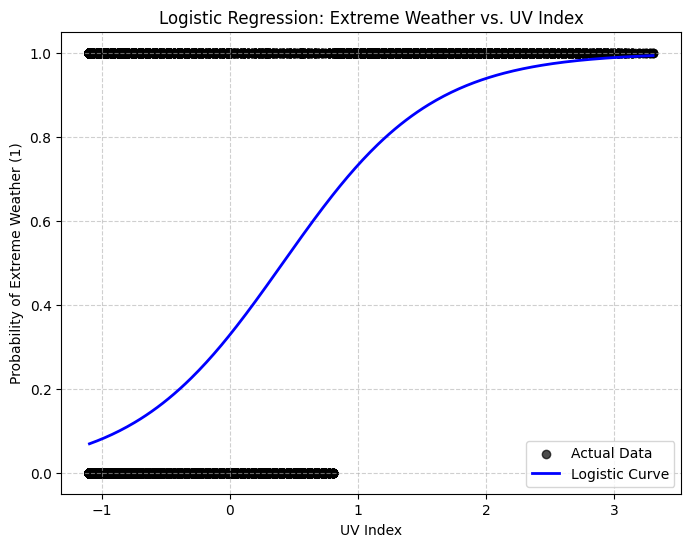

In [632]:
# Find the index of the 'uv_index' column in the original features list
uv_index_col = features.index('uv_index')
X_single = X_test[:, uv_index_col].reshape(-1, 1) # Select the column from the scaled array

y_single = y_test

# Train a new logistic regression model on this single feature
log_model_single = LogisticRegression()
log_model_single.fit(X_single, y_single)

# Create a range of uv_index values for prediction
x_range = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)

# Predict probabilities using the range
y_prob = log_model_single.predict_proba(x_range)[:, 1]

# Plot the actual points (0s and 1s)
plt.figure(figsize=(8, 6))
plt.scatter(X_single, y_single, color='black', label='Actual Data', alpha=0.7)

# Plot the sigmoid curve
plt.plot(x_range, y_prob, color='blue', linewidth=2, label='Logistic Curve')

# Labels and formatting
plt.xlabel('UV Index')
plt.ylabel('Probability of Extreme Weather (1)')
plt.title('Logistic Regression: Extreme Weather vs. UV Index')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **6.0 Building the model - Random Forest Classifier**

### **The model**

In [633]:
# The model's parameters
rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### **Visualize the most important features captured by the Random Forest Model**

/tmp/ipython-input-634-4289098609.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


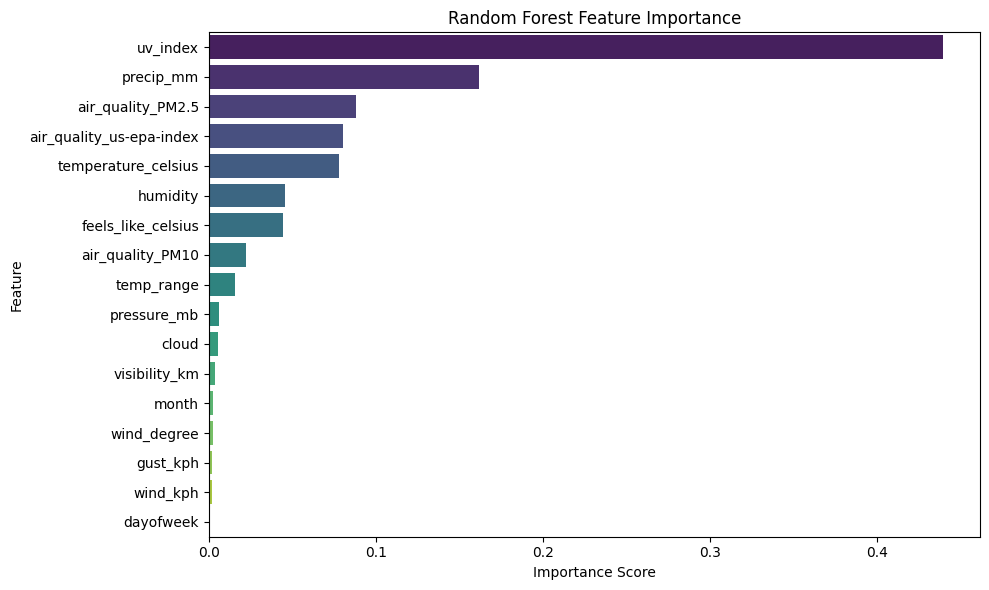

In [634]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **7.0 Data Visualization & Evaluation**

*   Prediction Metrics (Precision, Recall, F1-Score, Accuracy)
*   Confusion Matrix (True Positives, False Positives, True Negatives, False Negatives)
*   ROC & AUC Curve


### **For Logistic Regression**






In [635]:
# Predictions
log_pred = log_model.predict(X_test)

threshold = 0.6
log_proba = log_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
log_pred_custom = (log_proba >= threshold).astype(int) # Apply threshold to the array of probabilities

# Classification report
print("Classification Report: Logistic Regression")
print(classification_report(y_test, log_pred_custom))

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10124
           1       0.86      0.86      0.86      5987

    accuracy                           0.90     16111
   macro avg       0.89      0.89      0.89     16111
weighted avg       0.90      0.90      0.90     16111



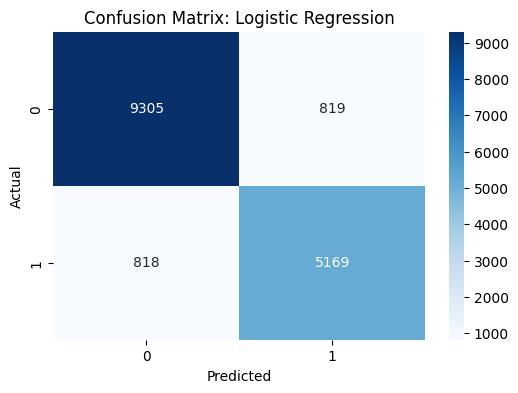

In [636]:
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, log_pred_custom), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix: Logistic Regression")
plt.show()

### **For Random Forest Classifer**


In [637]:
# Predictions
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report: Random Forest Classifier")
print(classification_report(y_test, rf_pred))

Classification Report: Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10124
           1       1.00      1.00      1.00      5987

    accuracy                           1.00     16111
   macro avg       1.00      1.00      1.00     16111
weighted avg       1.00      1.00      1.00     16111



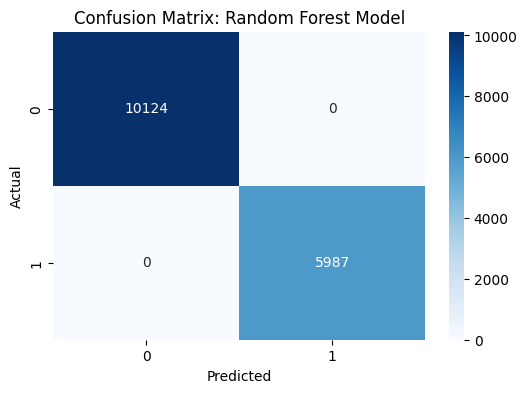

In [638]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix: Random Forest Model")
plt.show()

### **Comparing both ROC and AUC curves**

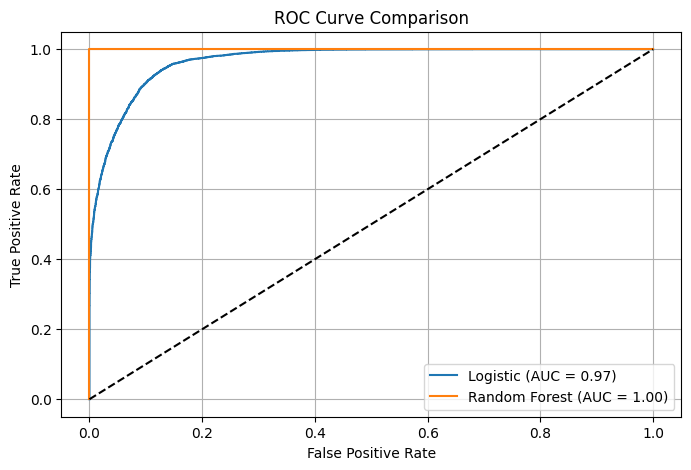

In [639]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_score(y_test, log_proba):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# **8.0 Testing on unseen data**


*   Justify the results



In [640]:
# New unseen data input
new_input = pd.DataFrame([{
   'temperature_celsius': 22,
    'feels_like_celsius': 23,
    'humidity': 50,
    'precip_mm': 0.2,
    'uv_index': 4,
    'cloud': 30,
    'wind_kph': 12,
    'gust_kph': 18,
    'wind_degree': 100,
    'visibility_km': 10,
    'pressure_mb': 1015,
    'air_quality_PM2.5': 12,
    'air_quality_PM10': 20,
    'air_quality_us-epa-index': 1,
    'temp_range': 2,
    'month': 4,
    'dayofweek': 0
}])


In [641]:
# Make sure that the new data is scaled.
new_input_scaled = scaler.transform(new_input)

In [642]:
# Logistic Regression Prediction
log_proba = log_model.predict_proba(new_input_scaled)[0][1]
threshold = 0.5
log_prediction = int(log_proba >= threshold)

print(f"Logistic Regression")
print(f"Predicted Probability of Extreme: {log_proba:.2f}")
print("Prediction:", "Extreme (1)" if log_prediction == 1 else "Normal (0)")


Logistic Regression
Predicted Probability of Extreme: 0.35
Prediction: Normal (0)


In [643]:
# Random Forest Classifier Prediction
rf_prediction = rf_model.predict(new_input_scaled)
rf_probability = rf_model.predict_proba(new_input_scaled)[0][1] # Select the probability for the positive class

print("Predicted class:", rf_prediction[0])
print(f"Predicted Probability of Extreme: {rf_probability:.2f}")
print("Prediction:", "Extreme (1)" if rf_prediction == 1 else "Normal (0)")

Predicted class: 0
Predicted Probability of Extreme: 0.00
Prediction: Normal (0)
